# OpenCV. РОБОТА із ЗОБРАЖЕННЯМИ
## Файл: CV_Image_05_002

### Просторова фільтрація зображень. Нелінійна фільтрація

#### SEE [Imgproc module](https://docs.opencv.org/2.4/doc/tutorials/imgproc/table_of_content_imgproc/table_of_content_imgproc.html)
#### SEE [Image Filtering](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html)
#### SEE [Miscellaneous Image Transformations](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=.threshold#cv2.threshold)

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt # this lets you draw inline pictures in the notebooks
import skimage.io as io
plt.rcParams['font.size'] = 10

In [2]:
import cv2 as cv
print (cv.__version__)

4.10.0


In [3]:
# ВИзначення та друк параметрів зображення
def image_data (image):
    rank     = len(image.shape)
    rows_num = image.shape[0] ## кількість рядків
    clms_num = image.shape[1] ## кількість колонок
    chen_num = 1
    if rank == 3: 
        chen_num = image.shape[2] ## кількість каналів
    print('Опис зображення ')
    print('IMAGE RANK',  rank)
    print('IMAGE SHAPE', image.shape)
    print('DATA Type',   image.dtype)
    return rows_num,clms_num, chen_num

In [4]:
# Convert ONE image from BGR to RGB & out
def image1_view (image, image_name):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.title(image_name)
    plt.imshow(rgb_image)
    plt.show()
    return 

In [5]:
# Convert TWO image from BGR to RGB & out
def image2_view (image1, image2, image1_name, image2_name):
    rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
    rgb_image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].set_title(image1_name)
    ax[0].imshow(rgb_image1)
    ax[1].set_title(image2_name)
    ax[1].imshow(rgb_image2)
    plt.show()
    return

### Функція згортки 2D зображення з визначеним ядром

cv.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst

Параметри:

- **src** - вхідне зображення.

- **det** - вихідне зображення того ж самого розміру та кількості каналів як і src.

- **kernel** – ядро згортки  (або ядро кореляції), матриця із плавучою комою.

- **anchor** - якір ядра, за замовчуванням (-1, -1) - центр ядра.

- **delta** - додаткова складова (додається до фільтрованоuj пікселя перед записом  до вихідного зображення.

- **bordertype** - метод  екстраполяції значень пікселів на границях зображення (дивись   **borderInterpolate**).

- **ddepth** -  бажана глибина вихідного зображення; якщо < 0 буде таким самим, як src.depth();  підтримуються такі комбінації src.depth() і ddepth::

  1. src.depth() = CV_8U, ddepth = -1/CV_16S/CV    _32F/CV_64F
  2. src.depth() = CV_16U/CV_16S, ddepth = -1/C    V_32F/CV_64F
  3. src.depth() = CV_32F, ddepth = -1/    CV_32F/CV_64F
  4. src.depth() = CV_64F

  

  Функція виконує операцію згортки (не конволюції):

$$\texttt{dst} (x,y) =  \sum _{ \stackrel{0\leq x' < \texttt{kernel.cols},}{0\leq y' < \texttt{kernel.rows}} }  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} rnel.rows - anchor.y - 1) $$

### [Пороговий зріз (Threshold)](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv.threshold#cv.Threshold)

Застосовує порогове значення фіксованого рівня до кожного елемента масиву.

cv.threshold(src, thresh, maxval, type[, dst]) → retval, dst

Параметри:

- **src** – вхідний масив (одноканальний, 8- або 32-бітний з плаваючою комою).

- **dst** – вихідний масив того самого розміру та типу, що й src.

- **thresh** – порогове значення.

- **maxval** – максимальне значення для використання з типами порогів THRESH_BINARY і THRESH_BINARY_INV.

- **type** – пороговий тип.

  

  Функція застосовує порогове значення фіксованого рівня до одноканального масиву. Зазвичай використовується для отримання дворівневого (binary двійкового) зображення із зображення у градаціях сірого або для видалення шуму, тобто фільтрування надто малих або надто великих пікселів значення.

  Функція підтримує кілька типів порогових значень. Вони визначаються за типом:

- THRESH_BINARY

$$\texttt{dst} (x,y) =  \begin{cases} \texttt{maxval  } {if \texttt{ src}(x,y) > \texttt{thresh}} \\ \texttt{ 0 }\texttt{  otherwise} \end{cases}$$

- THRESH_BINARY_INV

$$\texttt{dst} (x,y) =  \begin{cases} \texttt{   0  } {if \texttt{ src}(x,y) > \texttt{thresh}} \\ \texttt{thresh}\texttt{  otherwise} \end{cases}$$

- THRESH_TRUNC

$$\texttt{dst} (x,y) =  \begin{cases} \texttt{maxval  } {if \texttt{ src}(x,y) > \texttt{thresh}} \\ \texttt{ src(x,y) }\texttt{  otherwise} \end{cases}$$

- THRESH_TOZERO

$$\texttt{dst} (x,y) =  \begin{cases} \texttt{src(x,y)  } {if \texttt{ src}(x,y) > \texttt{thresh}} \\ \texttt{ 0 }\texttt{  otherwise} \end{cases}$$

- THRESH_TOZERO_INV

$$\texttt{dst} (x,y) =  \begin{cases} \texttt{   0  } {if \texttt{ src}(x,y) > \texttt{thresh}} \\ \texttt{src(x,y)}\texttt{  otherwise} \end{cases}$$

Крім того, спеціальне значення THRESH_OTSU може поєднуватися з одним із наведених вище значень. У цьому випадку функція визначає оптимальне порогове значення за допомогою алгоритму Оцу та використовує його замість зазначеного порогу. Функція повертає обчислене порогове значення. В даний час метод Оцу реалізований тільки для 8-бітних зображень.





### Приклади фільтру Превтт та Собеля побудовані на cv.filter2D

#### Читання зображення з файлу

In [6]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_img_ = cv.imread(path + filename, 0)
## Визначення стркутури та розміру зображення
image_data (test_img_)

Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type uint8


(512, 512, 1)

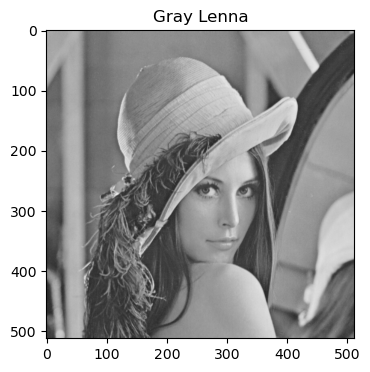

In [7]:
# Display whith Matplotlib
image1_view (test_img_, 'Gray Lenna')

#### Оператор (фільтр) Прюітт
Опера́тор Прюітт (Prewitt) використовують в обробці зображень, зокрема в алгоритмах виявляння контурів.
Математично це оператор дискретного диференціювання, який обчислює наближення градієнта функції яскравості зображення. У кожній точці зображення результат оператора Прюітт — або відповідний вектор градієнта, або норма цього вектора. Оператор Прюітт ґрунтується на згортанні зображення з невеликим роздільним цілочисловим фільтром в горизонтальному та вертикальному напрямках. Наближення градієнтна, яке він створює, відносно грубе.

Оператор використовує два ядра 3×3 для обчислення наближення похідних (одне для горизонтальних змін, друге — для вертикальних). 
Якщо маємо первинне зображення $Im(x,y)$,  а $G(x,y)_x$  та $G(x,y)_y$  —  два зображення, які в кожній точці містять наближення горизонтальної та вертикальної похідних, то їх обчислюють як 


$${\displaystyle \mathbf {G(x,y)_{x}} ={\begin{bmatrix}+1&0&-1\\+1&0&-1\\+1&0&-1\end{bmatrix}}*\mathbf {Im} ,\quad \mathbf {G(x,y)_{y}} ={\begin{bmatrix}+1&+1&+1\\0&0&0\\-1&-1&-1\end{bmatrix}}*\mathbf {Im} }$$

де  ${\displaystyle *}$  позначує операцію двовимірної згортки.

Координату ***x***  тут визначено як зростальну «ліворуч», а координату ***y*** — як зростальну «вгору». У кожній точці зображення отримані наближення градієнта можливо об'єднувати, щоб отримувати величину градієнту яскравості

$$ \displaystyle \mathbf {G(x,y)} = \mathbf {\sqrt{{G(x,y)_{x}^2}+{G(x,y)_{y}^2}}} $$ .

Також можна обчислити кут напрямку градієнту для кожного пікселя 

$$\mathbf {\Theta(x,y)}  = \mathbf {\arctan(\frac{G(x,y)_{y}}{G(x,y)_{x}})-\mathbf(\frac{3\pi}{4})}$$  

#### Ствоорюємо ядра за напрямками

In [8]:
kernel_size = (3, 3)  # Розмір ядра
kernel_x = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])
kernel_y = np.array([[1, 1, 1],
                     [0, 0, 0],
                     [-1, -1, -1]])

#### Обчислюємо градієнти за напрямками

In [9]:
grad_im_x = cv.filter2D(test_img_, cv.CV_64F, kernel_x)
grad_im_y = cv.filter2D(test_img_, cv.CV_64F, kernel_y)
print('GRAD_X SHAPE', grad_im_x.shape)
print('GRAD_X Type',grad_im_x.dtype)
print('GRAD_X SIZE',grad_im_x.size)

GRAD_X SHAPE (512, 512)
GRAD_X Type float64
GRAD_X SIZE 262144


#### Обчмслюємо модуль градиенту для кожного пікселя зображення

In [10]:
grad_im = cv.sqrt(grad_im_x**2 + grad_im_y**2)
print('GRAD_Im SHAPE', grad_im.shape)
print('GRAD_Im Type', grad_im.dtype)
print('GRAD_Im SIZE', grad_im.size)
print('GRAD_Im MIN', np.min(grad_im),'GRAD_Im MAX', np.max(grad_im) )

GRAD_Im SHAPE (512, 512)
GRAD_Im Type float64
GRAD_Im SIZE 262144
GRAD_Im MIN 0.0 GRAD_Im MAX 489.0654352947057


#### Приведення до діапазону [0 ... 255] (нормалізація та перетворення до uint8)

In [11]:
grad_norm = cv.normalize(grad_im, None, 0, 255, cv.NORM_MINMAX)
grad_uint8 = grad_norm.astype(np.uint8)
image_data (grad_uint8)

Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type uint8


(512, 512, 1)

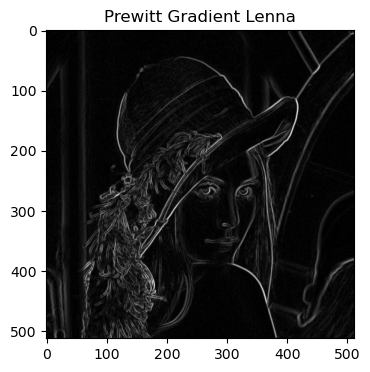

In [12]:
# Display whith Matplotlib
image1_view (grad_uint8, 'Prewitt Gradient Lenna')

#### Бінарізація (зріз) зображення градієнту

In [13]:
gamma1 = 50
gamma2 = 100
maxval=255

filtr_im_g1 = np.zeros ( (grad_norm.shape[0], grad_norm.shape[1], 3), dtype=np.uint32)
filtr_im_g2 = np.zeros ( (grad_norm.shape[0], grad_norm.shape[1], 3), dtype=np.uint32)

retval1, filtr_im_g1 = cv.threshold(grad_norm, gamma1, maxval, cv.THRESH_BINARY)
print('Зріз gamma =', retval1)
image_data (filtr_im_g1)
retval2, filtr_im_g2 = cv.threshold(grad_norm, gamma2, maxval, cv.THRESH_BINARY)
print('Зріз gamma =',retval2)
image_data (filtr_im_g2)

Зріз gamma = 50.0
Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type float64
Зріз gamma = 100.0
Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type float64


(512, 512, 1)

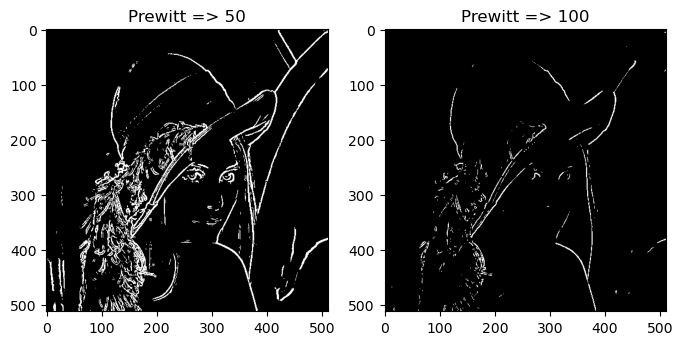

In [14]:
image2_view (filtr_im_g1.astype(np.uint8), filtr_im_g2.astype(np.uint8), "Prewitt => 50", "Prewitt => 100")

#### Фільтр Собеля

In [15]:
# Завантаження зображення
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_img_ = cv.imread(path + filename, 0)
## Визначення стркутури та розміру зображення
image_data (test_img_)

Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type uint8


(512, 512, 1)

In [16]:
kernel_size = (3, 3)  # Розмір ядра
kernel_x_ = np.array([[1, 0, -1],
                     [1, 0, -2],
                     [1, 0, -1]])
kernel_y_ = np.array([[1, 2, 1],
                     [0, 0, 0],
                     [-1, -2, -1]])

In [17]:
# Sobel gradient
grad_im_x_ = cv.filter2D(test_img_, cv.CV_64F, kernel_x_)
grad_im_y_ = cv.filter2D(test_img_, cv.CV_64F, kernel_y_)
print('GRAD_X SHAPE', grad_im_x.shape)
print('GRAD_X Type',grad_im_x.dtype)
print('GRAD_X SIZE',grad_im_x.size)

GRAD_X SHAPE (512, 512)
GRAD_X Type float64
GRAD_X SIZE 262144


In [18]:
grad_im_ = cv.sqrt(grad_im_x_**2 + grad_im_y_**2)
image_data (grad_im_)

Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type float64


(512, 512, 1)

In [19]:
grad_norm_ = cv.normalize(grad_im_, None, 0, 255, cv.NORM_MINMAX)
grad_uint8_ = grad_norm_.astype(np.uint8)
image_data (grad_uint8_)

Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type uint8


(512, 512, 1)

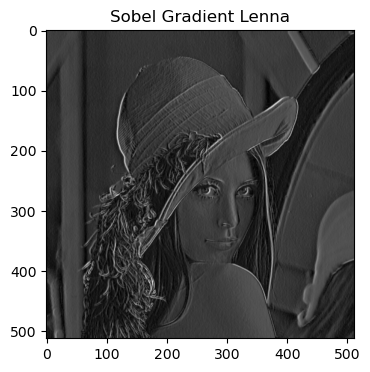

In [20]:
# Display whith Matplotlib
image1_view (grad_uint8_, 'Sobel Gradient Lenna')

In [21]:
gamma1 = 50
gamma2 = 100
maxval=255

filtr_im_g1_ = np.zeros ( (grad_norm_.shape[0], grad_norm_.shape[1], 3), dtype=np.uint32)
filtr_im_g2_ = np.zeros ( (grad_norm_.shape[0], grad_norm_.shape[1], 3), dtype=np.uint32)

retval1, filtr_im_g1_ = cv.threshold(grad_norm_, gamma1, maxval, cv.THRESH_BINARY)
print('Зріз gamma =', retval1)
image_data (filtr_im_g1_)
retval2, filtr_im_g2_ = cv.threshold(grad_norm_, gamma2, maxval, cv.THRESH_BINARY)
print('Зріз gamma =',retval2)
image_data (filtr_im_g2_)

Зріз gamma = 50.0
Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type float64
Зріз gamma = 100.0
Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type float64


(512, 512, 1)

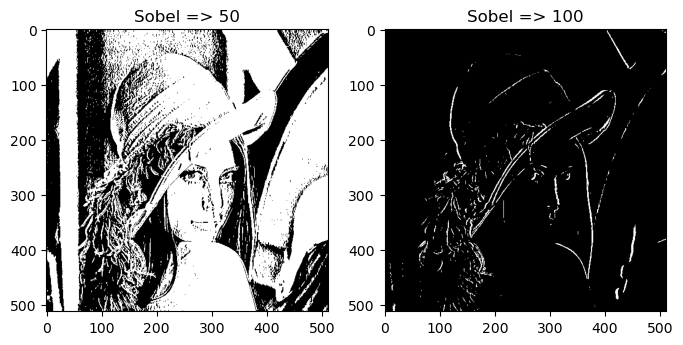

In [22]:
image2_view (filtr_im_g1_.astype(np.uint8), filtr_im_g2_.astype(np.uint8), "Sobel => 50", "Sobel => 100")

#### Градієнет за Лапласом

In [23]:
# Завантаження зображення
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_img_ = cv.imread(path + filename, 0)
## Визначення стркутури та розміру зображення
image_data (test_img_)

Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type uint8


(512, 512, 1)

In [24]:
# Використвуємо фільтр Лапласа
laplacian_im = cv.Laplacian(test_img_ , cv.CV_64F)
laplacian = np.uint8(np.absolute(laplacian_im))

In [25]:
# Відображуємо за допомогою CV
# Wait for a key press and close the window
while True:
    cv.imshow('Original IMAGE', test_img_)
    if cv.waitKey(1) == ord('q'):
        break
while True:
    cv.imshow('Laplacian IMAGE', laplacian)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()

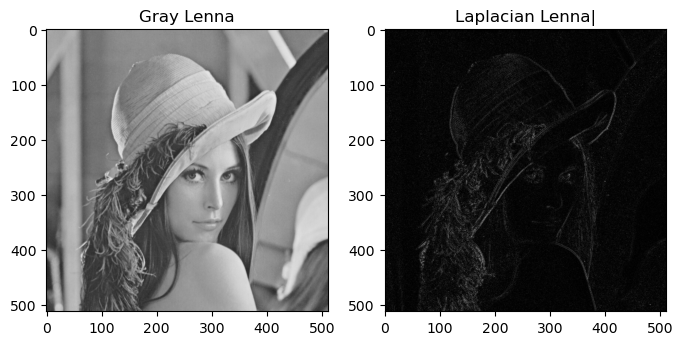

In [26]:
image2_view (test_img_, laplacian, "Gray Lenna", "Laplacian Lenna|")